In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

In [158]:
#Lectura de documento txt con tabulación (/t) como delimitador
array1 = np.genfromtxt("ECG_reposo.txt", delimiter="\t")
array2= np.genfromtxt("ECG_sinrespirar1.txt", delimiter="\t")
array3= np.genfromtxt("ECG_reposo2.txt", delimiter="\t")
array4= np.genfromtxt("ECG_movimiento.txt", delimiter="\t")
d_sensor = array1[:,-2]
print("Sensor 1:",d_sensor)
d_sensor2 = array2[:,-2]
print("Sensor 2:",d_sensor2)
d_sensor3= array3[:,-2]
print("Sensor 3:",d_sensor3)
d_sensor4= array4[:,-2]
print("Sensor 4:",d_sensor4)

Sensor 1: [506. 507. 506. ... 512. 510. 510.]
Sensor 2: [507. 509. 511. ... 527. 527. 527.]
Sensor 3: [507. 508. 509. ... 540. 540. 537.]
Sensor 4: [493. 495. 497. ... 497. 498. 500.]


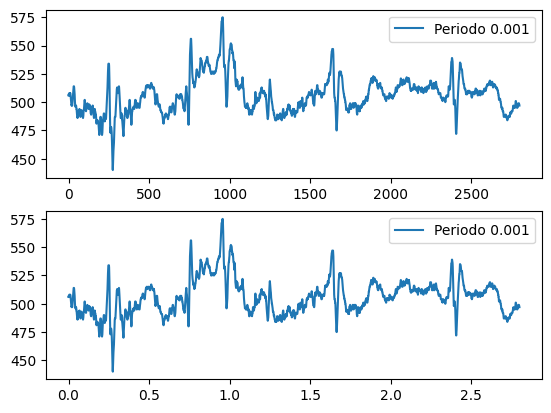

In [159]:
#eje de tiempo en seg
Fs=1000; #Frecuencia de muestreo
T1=1/Fs
d_sensor=d_sensor[0:2800]
d_sensor2=d_sensor2[0:2800]
d_sensor3=d_sensor3[0:2800]
d_sensor4=d_sensor4[0:2800]
#Los elementos ahora son los mismos para todas las señales
M = len(d_sensor)
n = np.arange(0,M)

t = n/Fs

#Señal en reposo
fig,axes = plt.subplots(2)
axes[0].plot(n,d_sensor,label=f"Periodo {T1}")
axes[0].legend()
axes[1].plot(t,d_sensor,label=f"Periodo {T1}")
axes[1].legend()

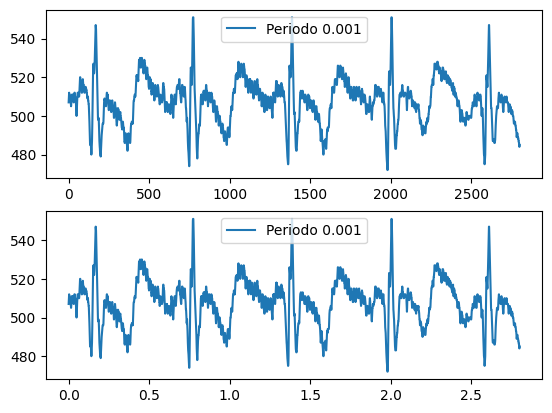

In [160]:
#Señal de actividad sin respirar
fig,axes = plt.subplots(2)
axes[0].plot(n,d_sensor2,label=f"Periodo {T1}")
axes[0].legend()
axes[1].plot(t,d_sensor2,label=f"Periodo {T1}")
axes[1].legend()

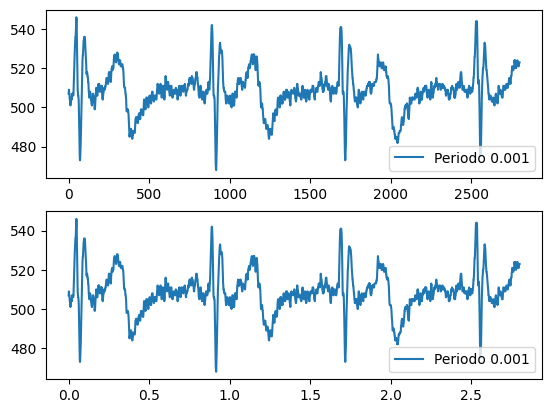

In [161]:
#Señal de actividad en reposo 2
fig,axes = plt.subplots(2)
axes[0].plot(n,d_sensor3,label=f"Periodo {T1}")
axes[0].legend()
axes[1].plot(t,d_sensor3,label=f"Periodo {T1}")
axes[1].legend()

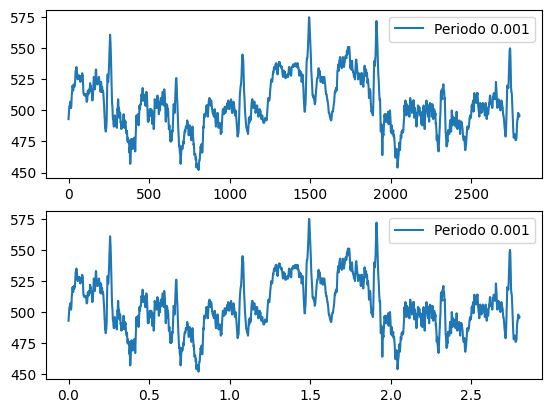

In [162]:
#Señal en movimiento
fig,axes = plt.subplots(2)
axes[0].plot(n,d_sensor4,label=f"Periodo {T1}")
axes[0].legend()
axes[1].plot(t,d_sensor4,label=f"Periodo {T1}")
axes[1].legend()

## DFT de N puntos

In [163]:
#transformada de fourier FFT
N1 = len(d_sensor)
N2= len(d_sensor2)
N3=len(d_sensor3)
N4=len(d_sensor4)
D1 = np.fft.fft(d_sensor,N1)
D2 = np.fft.fft(d_sensor2,N2)
D3 = np.fft.fft(d_sensor3,N3)
D4 = np.fft.fft(d_sensor4,N4)

D1 = D1[0:(N1//2)]
D2 = D2[0:(N2//2)]
D3 = D3[0:(N3//2)]
D4 = D4[0:(N4//2)]

In [164]:
#magnitud para las cuatro señales en la frecuencia
D1m = np.abs(D1)
D1m = np.round(D1m,3)
D2m = np.abs(D2)
D2m = np.round(D2m,3)
D3m = np.abs(D3)
D3m = np.round(D3m,3)
D4m = np.abs(D4)
D4m = np.round(D4m,3)

#frecuencias
F = np.linspace(0, Fs/2, N1//2)

#eje de tiempo en seg
t = n/Fs #Para todos es el mismo tiempo por haber delimitado las señales

Text(0.5, 1.0, ' Análisis en frecuencia En reposo1')

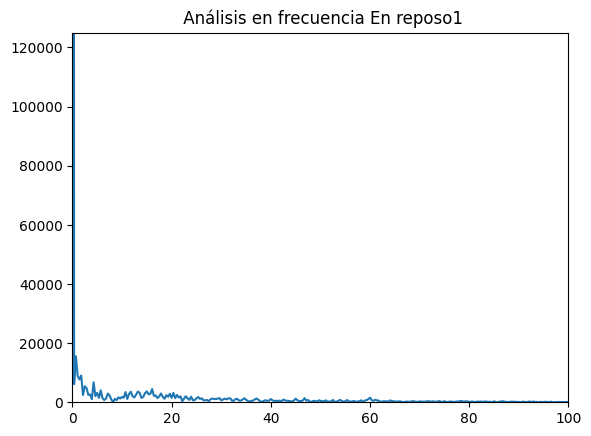

In [165]:
plt.plot(F,D1m)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia En reposo1")

Text(0.5, 1.0, ' Análisis en frecuencia sin respirar')

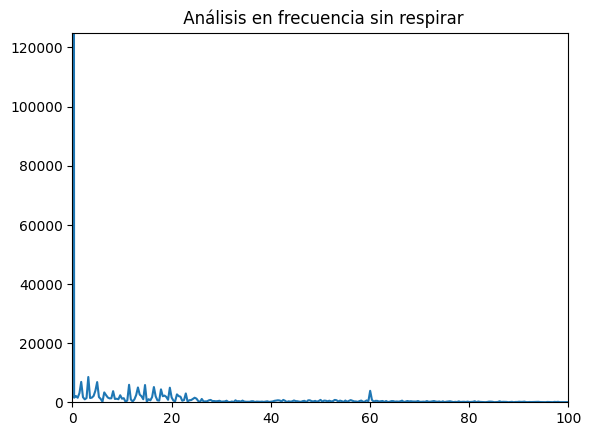

In [166]:
plt.plot(F,D2m)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia sin respirar")

Text(0.5, 1.0, ' Análisis en frecuencia En reposo2')

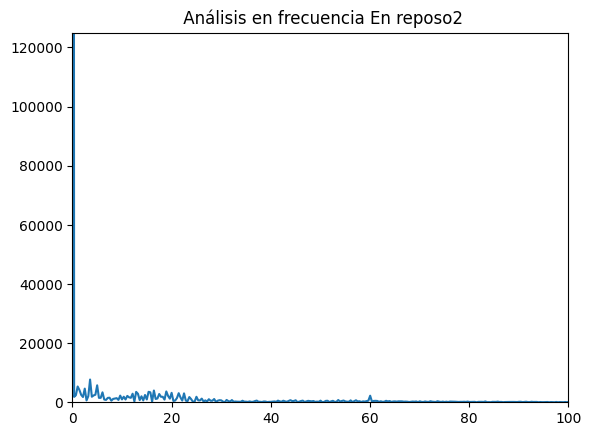

In [167]:
plt.plot(F,D3m)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia En reposo2")

Text(0.5, 1.0, ' Análisis en frecuencia en movimiento')

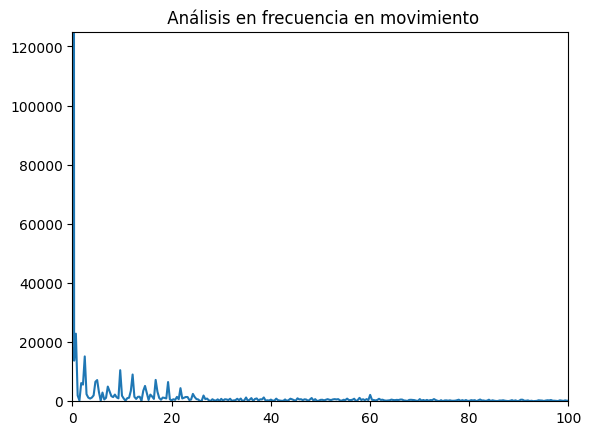

In [168]:
plt.plot(F,D4m)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia en movimiento")

## Diseñar el filtro FIR pasa bajos

In [184]:
#Para el diseño del FIR vamos a incluir el diseño con la ventaba Blackman. Esto se realiza porque la atenuación que genera es mucho mayor que a
#las diferentes ventanas que se aplican
#longitud de la ventana
M = 100
#frecuencia de corte en Hz
Fc = 20 #Valor sugerido en la guia

#Frecuencia de corte en radianes
wc = 2*np.pi*Fc/Fs

# filtro fir
w = firwin(numtaps=M, cutoff=Fc, window='blackman', fs=Fs)
w = np.round(w,3)

In [185]:
nm = np.arange(M)
W = np.fft.fft(w,N1)
W = np.round(W[0:N1//2],3)

#magnitud
Wm = np.abs(W)
Rx = Fc*np.ones([N1//2])
Ry = np.linspace(0,1,N1//2)

Text(0.5, 1.0, ' Análisis en frecuencia En reposo1')

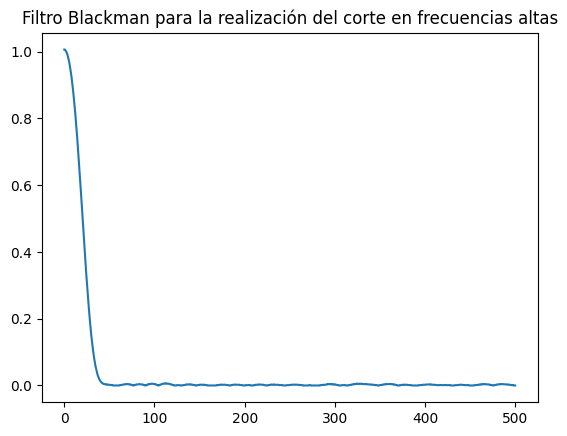

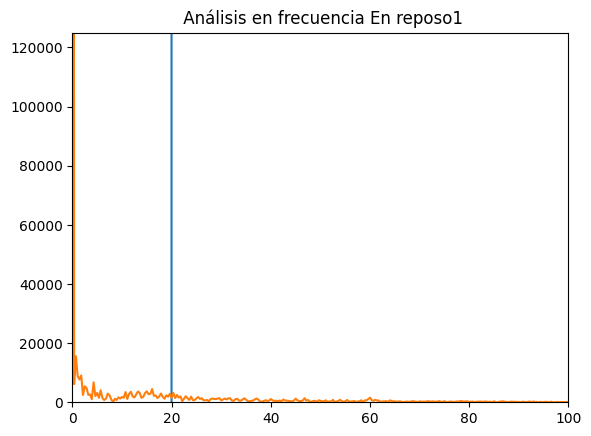

In [186]:
Ry = np.linspace(0,np.max(D1m),N1//2) #el eje y

plt.figure()
plt.plot(F,Wm)
plt.title("Filtro Blackman para la realización del corte en frecuencias altas")

plt.figure()
plt.plot(Rx,Ry)
plt.plot(F,D1m)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia En reposo1")

Text(0.5, 1.0, ' Análisis en frecuencia sin respirar')

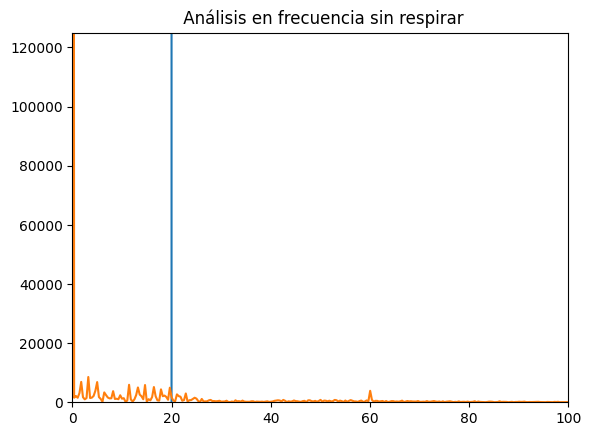

In [187]:
plt.plot(Rx,Ry)
plt.plot(F,D2m)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia sin respirar")

Text(0.5, 1.0, ' Análisis en frecuencia En reposo2')

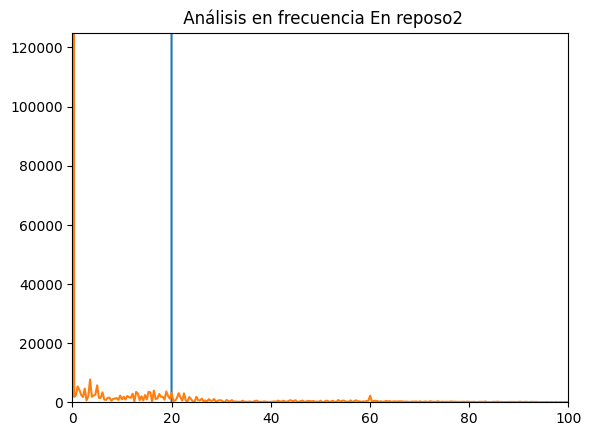

In [188]:
plt.plot(Rx,Ry)
plt.plot(F,D3m)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia En reposo2")

Text(0.5, 1.0, ' Análisis en frecuencia en movimiento')

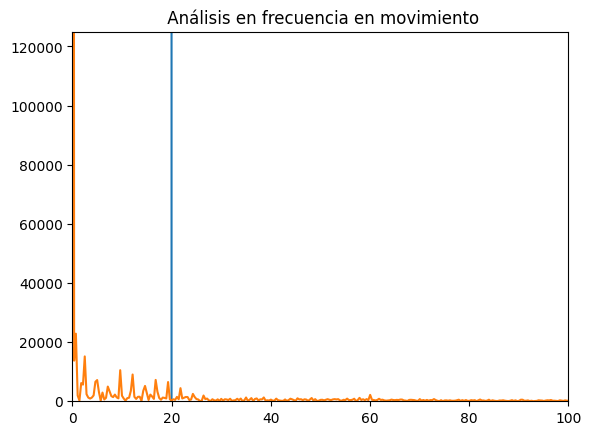

In [189]:
plt.plot(Rx,Ry)
plt.plot(F,D4m)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia en movimiento")

### Aplicación del filtro FIR a la entrada de: sensor1,sensor2,sensor3,sensor4

In [190]:
#Aplicacion de los filtros con la señal original en el tiempo para realizar la convolución de las señales
y1 = lfilter(w, np.array(1),d_sensor)
y2 = lfilter(w, np.array(1),d_sensor2)
y3 = lfilter(w, np.array(1),d_sensor3)
y4 = lfilter(w, np.array(1),d_sensor4)
#Una vez realizada la convolución de las señales en el tiempo se realiza la DFT con el comando FFT para evaluar la salida filtrada por el 
#pasabajos.
Y1 = np.fft.fft(y1,N1)
Y1 = np.round(Y1[0:N1//2],3)
Y2 = np.fft.fft(y2,N1)
Y2 = np.round(Y2[0:N1//2],3)
Y3 = np.fft.fft(y3,N1)
Y3 = np.round(Y3[0:N1//2],3)
Y4 = np.fft.fft(y4,N1)
Y4 = np.round(Y4[0:N1//2],3)
Ym1 = np.abs(Y1)
Ym2 = np.abs(Y2)
Ym3 = np.abs(Y3)
Ym4 = np.abs(Y4)


Text(0.5, 1.0, ' Análisis en frecuencia En reposo1 realizado el corte')

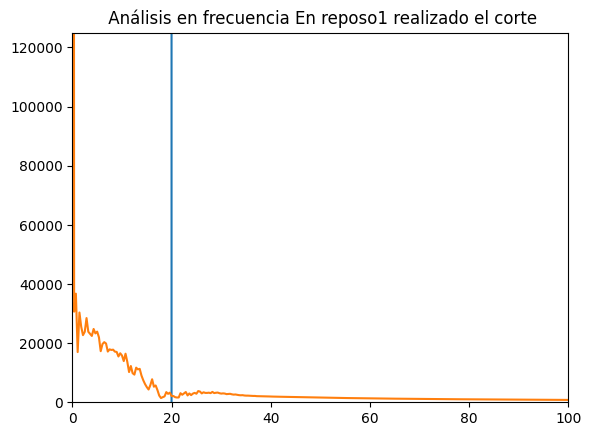

In [191]:
Ry = np.linspace(0,np.max(D1m),N1//2) #el eje y

plt.plot(Rx,Ry)
plt.plot(F,Ym1)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia En reposo1 realizado el corte")

Text(0.5, 1.0, ' Análisis en frecuencia sin respirar realizado el corte')

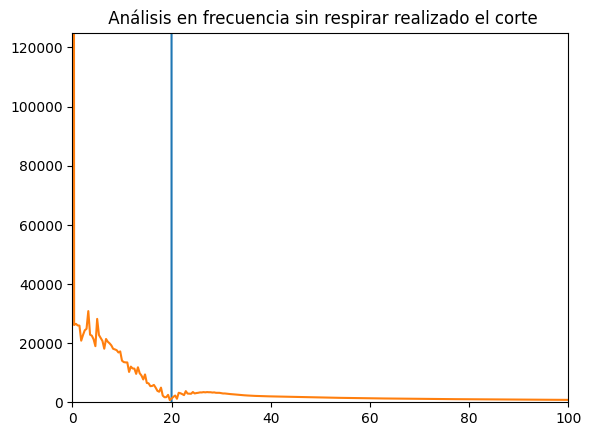

In [192]:
plt.plot(Rx,Ry)
plt.plot(F,Ym2)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia sin respirar realizado el corte")

Text(0.5, 1.0, ' Análisis en frecuencia en reposo2 realizado el corte')

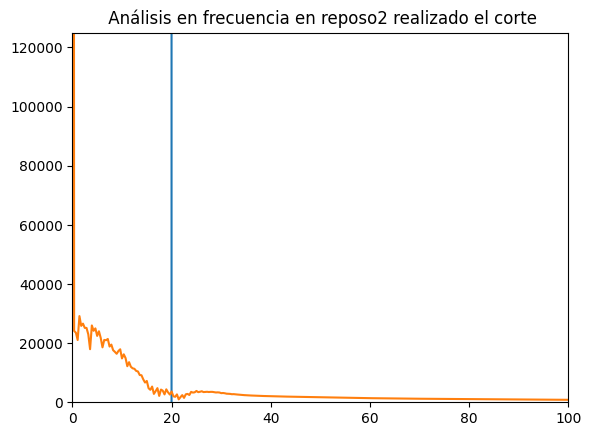

In [193]:
plt.plot(Rx,Ry)
plt.plot(F,Ym3)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia en reposo2 realizado el corte")

Text(0.5, 1.0, ' Análisis en frecuencia en movimiento realizado el corte')

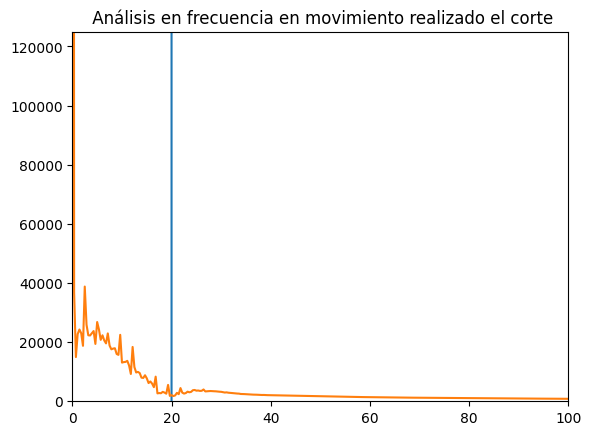

In [194]:
plt.plot(Rx,Ry)
plt.plot(F,Ym4)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia en movimiento realizado el corte")

Text(0.5, 1.0, ' Análisis en tiempo En reposo1 realizado el corte')

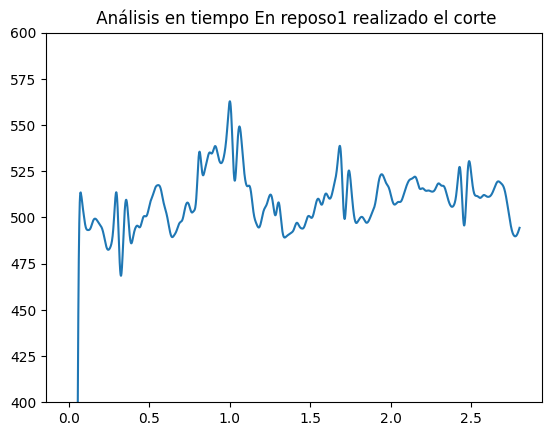

In [203]:
plt.plot(t,y1)
plt.ylim([400,600])
plt.title(" Análisis en tiempo En reposo1 realizado el corte")

Text(0.5, 1.0, ' Análisis en tiempo sin respirar realizado el corte')

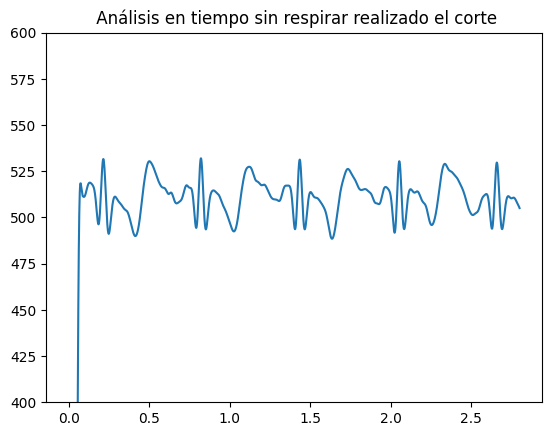

In [204]:
plt.plot(t,y2)
plt.ylim([400,600])
plt.title(" Análisis en tiempo sin respirar realizado el corte")

Text(0.5, 1.0, ' Análisis en tiempo de la señal en reposo2 realizado el corte')

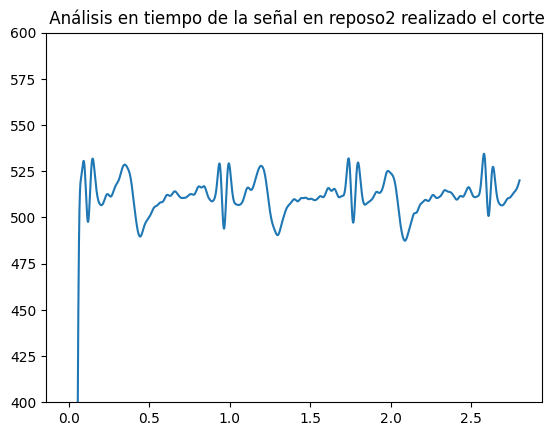

In [205]:
plt.plot(t,y3)
plt.ylim([400,600])
plt.title(" Análisis en tiempo de la señal en reposo2 realizado el corte")

Text(0.5, 1.0, ' Análisis en tiempo de la señal en movimiento realizado el corte')

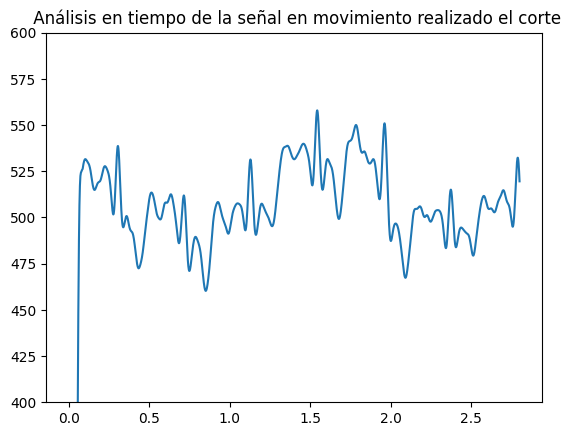

In [206]:
plt.plot(t,y4)
plt.ylim([400,600])
plt.title(" Análisis en tiempo de la señal en movimiento realizado el corte")